<a href="https://colab.research.google.com/github/NotSrihan/CS290/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install palmerpenguins


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [5]:
from palmerpenguins import load_penguins
import pandas as pd

# Load the penguins dataset
penguins = load_penguins()

# Convert to a pandas DataFrame for easier manipulation
df = pd.DataFrame(penguins)
print(df.head())



  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [6]:
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
y = df['species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
import numpy as np
from collections import Counter


def distance(x1, x2):
    return np.linalg.norm(x1 - x2)

class KNN:
    k = 3
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):

        distances = [distance(x, x_train) for x_train in self.X_train]
        k_nearest = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.y_train[i] for i in k_nearest]
        return Counter(k_nearest_labels).most_common(1)[0][0]


In [8]:
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
knn = KNN()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(class_report)

Accuracy: 0.9855072463768116
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        32
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

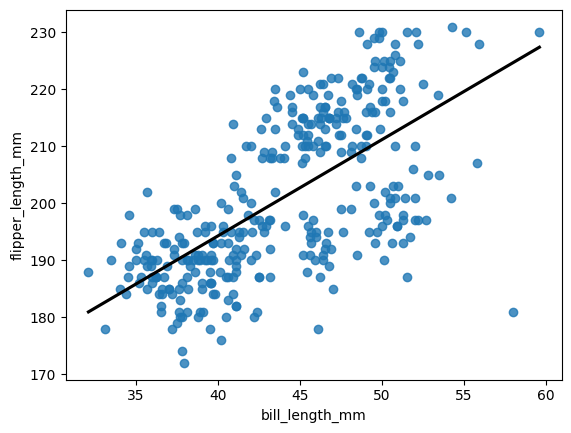

In [14]:
sns.regplot(data = penguins, x="bill_length_mm", y="flipper_length_mm",ci=None,line_kws={"color": "black"})

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

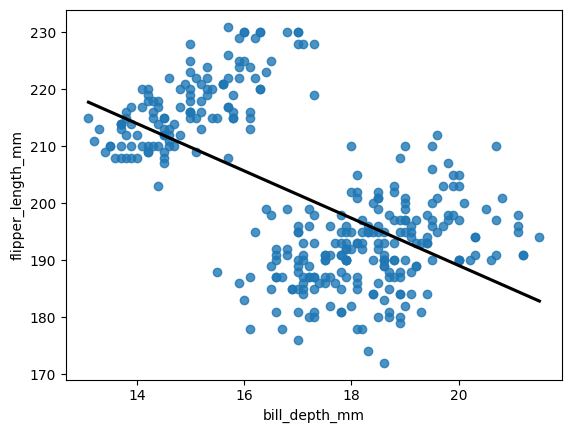

In [15]:
sns.regplot(data = penguins, x="bill_depth_mm", y="flipper_length_mm",ci=None,line_kws={"color": "black"})

In [21]:
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your original data
# ... (your code to load and prepare X and y) ...

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Or 'median', 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))



Logistic Regression Accuracy: 0.9855072463768116
[[31  1  0]
 [ 0 13  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        32
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



In [23]:
# Support Vector Machine model]
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9710144927536232
[[30  2  0]
 [ 0 13  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      0.94      0.97        32
   Chinstrap       0.87      1.00      0.93        13
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.97        69
   macro avg       0.96      0.98      0.97        69
weighted avg       0.97      0.97      0.97        69



In [25]:
sgd_clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_sgd = sgd_clf.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"SGD Classifier Accuracy: {accuracy_sgd}")
print(confusion_matrix(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_sgd))

SGD Classifier Accuracy: 0.9710144927536232
[[30  1  1]
 [ 0 13  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      0.94      0.97        32
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       0.96      1.00      0.98        24

    accuracy                           0.97        69
   macro avg       0.96      0.98      0.97        69
weighted avg       0.97      0.97      0.97        69

